## Importing Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression
import warnings
warnings.filterwarnings('ignore')

## Reading and Understanding the data

In [2]:
# read csv file through pandas
bike_df = pd.read_csv('day.csv')

In [3]:
bike_df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,1,1,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,2,1,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,3,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,4,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,5,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


## column detail

- instant: record index
	- dteday : date
	- season : season (1:spring, 2:summer, 3:fall, 4:winter)
	- yr : year (0: 2018, 1:2019)
	- mnth : month ( 1 to 12)
	- holiday : weather day is a holiday or not (extracted from http://dchr.dc.gov/page/holiday-schedule)
	- weekday : day of the week
	- workingday : if day is neither weekend nor holiday is 1, otherwise is 0.
	+ weathersit : 
		- 1: Clear, Few clouds, Partly cloudy, Partly cloudy
		- 2: Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist
		- 3: Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds
	- temp : temperature in Celsius
	- atemp: feeling temperature in Celsius
	- hum: humidity
	- windspeed: wind speed
	- casual: count of casual users
	- registered: count of registered users
	- cnt: count of total rental bikes including both casual and registered

In [4]:
bike_df.shape

(730, 16)

In [5]:
bike_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     730 non-null    int64  
 1   dteday      730 non-null    object 
 2   season      730 non-null    int64  
 3   yr          730 non-null    int64  
 4   mnth        730 non-null    int64  
 5   holiday     730 non-null    int64  
 6   weekday     730 non-null    int64  
 7   workingday  730 non-null    int64  
 8   weathersit  730 non-null    int64  
 9   temp        730 non-null    float64
 10  atemp       730 non-null    float64
 11  hum         730 non-null    float64
 12  windspeed   730 non-null    float64
 13  casual      730 non-null    int64  
 14  registered  730 non-null    int64  
 15  cnt         730 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.4+ KB


In [6]:
bike_df.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000
mean,365.500000,2.498630,0.500000,6.526027,0.028767,2.995890,0.690411,1.394521,20.319259,23.726322,62.765175,12.763620,849.249315,3658.757534,4508.006849
std,210.877136,1.110184,0.500343,3.450215,0.167266,2.000339,0.462641,0.544807,7.506729,8.150308,14.237589,5.195841,686.479875,1559.758728,1936.011647
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,2.424346,3.953480,0.000000,1.500244,2.000000,20.000000,22.000000
25%,183.250000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,13.811885,16.889713,52.000000,9.041650,316.250000,2502.250000,3169.750000
50%,365.500000,3.000000,0.500000,7.000000,0.000000,3.000000,1.000000,1.000000,20.465826,24.368225,62.625000,12.125325,717.000000,3664.500000,4548.500000
75%,547.750000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,26.880615,30.445775,72.989575,15.625589,1096.500000,4783.250000,5966.000000
max,730.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,35.328347,42.044800,97.250000,34.000021,3410.000000,6946.000000,8714.000000


## Finding:


- Dataset has 730 rows and 16 columns.
- All the columns are integer ot flot, expect one column.
- There seems to be some features that are categorical but converted in integer or flot type.


In [7]:
bike_df['dteday'].min(), bike_df['dteday'].max()

('01-01-2018', '31-12-2019')

## Checking for null values


In [8]:
bike_df.isna().sum()

instant       0
dteday        0
season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

In [9]:
# percentage of null values in all columns
bike_df.isna().sum()/len(bike_df)

instant       0.0
dteday        0.0
season        0.0
yr            0.0
mnth          0.0
holiday       0.0
weekday       0.0
workingday    0.0
weathersit    0.0
temp          0.0
atemp         0.0
hum           0.0
windspeed     0.0
casual        0.0
registered    0.0
cnt           0.0
dtype: float64

## Finding

- There are no missing values in columns.


## Duplicate ckecking

In [10]:
bike_df_dup = bike_df.copy()

In [11]:
bike_df_dup.drop_duplicates(inplace=True)

In [12]:
bike_df_dup.shape

(730, 16)

## Finding 

- There are no duplicate values in the dataframe.

## Data Cleaning

## Removing redundant & unwanted columns

- Based on the high level look at the data and the data dictionary, the following variables can be removed from further analysis:
 
- instant : Its only an index value

- dteday : This has the date, Since we already have seperate columns for 'year' & 'month',hence, we could live without this column.

- casual & registered : Both these columns contains the count of bike booked by different categories of customers. Since our objective is to find the total count of bikes and not by specific category, we will ignore these two columns. More over, we have created a new variable to have the ratio of these customer types.

In [13]:
new_bike_df = bike_df[['season', 'yr', 'mnth', 'holiday', 'weekday',
       'workingday', 'weathersit', 'temp', 'atemp', 'hum', 'windspeed',
       'cnt']]

In [14]:
new_bike_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   season      730 non-null    int64  
 1   yr          730 non-null    int64  
 2   mnth        730 non-null    int64  
 3   holiday     730 non-null    int64  
 4   weekday     730 non-null    int64  
 5   workingday  730 non-null    int64  
 6   weathersit  730 non-null    int64  
 7   temp        730 non-null    float64
 8   atemp       730 non-null    float64
 9   hum         730 non-null    float64
 10  windspeed   730 non-null    float64
 11  cnt         730 non-null    int64  
dtypes: float64(4), int64(8)
memory usage: 68.6 KB


In [15]:
for col in new_bike_df.columns:
    print(new_bike_df[col].value_counts())

season
3    188
2    184
1    180
4    178
Name: count, dtype: int64
yr
0    365
1    365
Name: count, dtype: int64
mnth
1     62
3     62
5     62
7     62
8     62
10    62
12    62
4     60
6     60
9     60
11    60
2     56
Name: count, dtype: int64
holiday
0    709
1     21
Name: count, dtype: int64
weekday
1    105
2    105
3    104
4    104
5    104
6    104
0    104
Name: count, dtype: int64
workingday
1    504
0    226
Name: count, dtype: int64
weathersit
1    463
2    246
3     21
Name: count, dtype: int64
temp
26.035000    5
10.899153    5
27.880000    4
28.563347    4
23.130847    4
            ..
27.435847    1
26.376653    1
28.989419    1
28.700000    1
8.849153     1
Name: count, Length: 498, dtype: int64
atemp
32.73440    4
18.78105    3
31.85040    3
28.59875    2
23.32625    2
           ..
28.94730    1
30.46145    1
30.10650    1
31.34500    1
11.17435    1
Name: count, Length: 689, dtype: int64
hum
61.3333    4
63.0833    3
55.2083    3
60.5000    3
56.8333    3


## Handling Outliers

In [16]:
# printing number of unique values in all columns
new_bike_df.nunique()

season          4
yr              2
mnth           12
holiday         2
weekday         7
workingday      2
weathersit      3
temp          498
atemp         689
hum           594
windspeed     649
cnt           695
dtype: int64

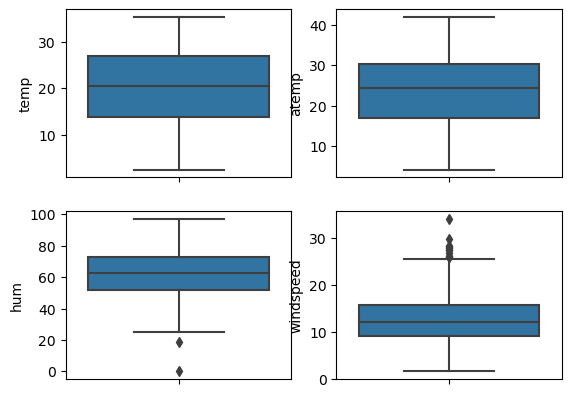

In [17]:
#

cols=['temp','atemp','hum','windspeed']
plt.figure()
i=1
for col in cols:
    plt.subplot(2,2,i)
    sns.boxplot(y=col , data=new_bike_df)
    i += 1

- There are no such outliers to handle.

## Creating Dummy Variables

- We will create DUMMY variables for 4 categorical variables 'mnth', 'weekday', 'season' & 'weathersit'.

In [18]:
new_bike_df['season']=new_bike_df['season'].astype('category')
new_bike_df['weathersit']=new_bike_df['weathersit'].astype('category')
new_bike_df['mnth']=new_bike_df['mnth'].astype('category')
new_bike_df['weekday']=new_bike_df['weekday'].astype('category')

In [19]:
new_bike_df = pd.get_dummies(new_bike_df, drop_first=True, dtype='int')

In [20]:
new_bike_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 30 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   yr            730 non-null    int64  
 1   holiday       730 non-null    int64  
 2   workingday    730 non-null    int64  
 3   temp          730 non-null    float64
 4   atemp         730 non-null    float64
 5   hum           730 non-null    float64
 6   windspeed     730 non-null    float64
 7   cnt           730 non-null    int64  
 8   season_2      730 non-null    int64  
 9   season_3      730 non-null    int64  
 10  season_4      730 non-null    int64  
 11  mnth_2        730 non-null    int64  
 12  mnth_3        730 non-null    int64  
 13  mnth_4        730 non-null    int64  
 14  mnth_5        730 non-null    int64  
 15  mnth_6        730 non-null    int64  
 16  mnth_7        730 non-null    int64  
 17  mnth_8        730 non-null    int64  
 18  mnth_9        730 non-null    

In [21]:
new_bike_df.shape 

(730, 30)

## Splittting the Data

In [22]:
df_train, df_test = train_test_split(new_bike_df, train_size=0.70, random_state= 42)

In [23]:
df_train.shape

(510, 30)

In [24]:
df_test.shape

(220, 30)

## EDA

In [25]:
df_train.head()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,season_2,season_3,...,mnth_11,mnth_12,weekday_1,weekday_2,weekday_3,weekday_4,weekday_5,weekday_6,weathersit_2,weathersit_3
645,1,1,0,15.716653,19.38040,70.9583,12.708493,5478,0,0,...,0,0,0,1,0,0,0,0,1,0
163,0,0,1,26.035000,30.08270,49.4583,20.458450,5020,1,0,...,0,0,0,0,1,0,0,0,0,0
360,0,0,1,13.325000,16.38165,76.2500,12.626150,1162,0,0,...,0,1,0,0,0,1,0,0,1,0
640,1,0,1,26.957500,29.95665,79.3750,4.458569,7572,0,0,...,0,0,0,0,0,1,0,0,1,0
625,1,0,1,25.556653,28.25335,87.2500,23.958329,4073,0,1,...,0,0,0,0,1,0,0,0,1,0


## Visualising Numeric Variables

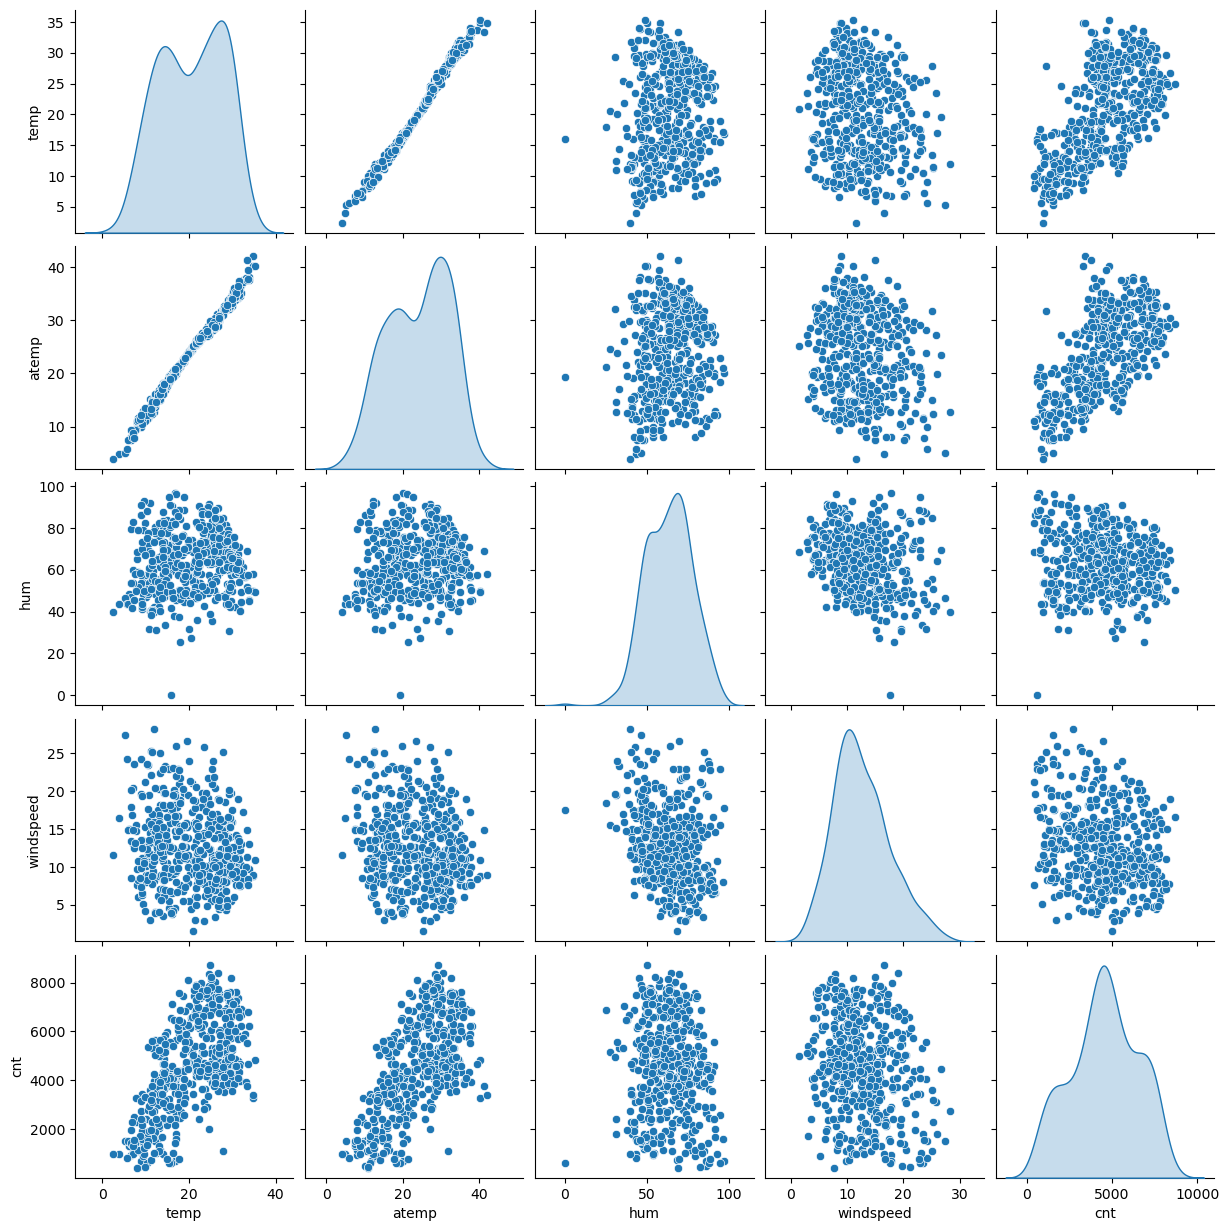

In [26]:
# Creating pair plot of numeric variables

bike_num = df_train[['temp', 'atemp', 'hum', 'windspeed','cnt']]

sns.pairplot(data= bike_num, diag_kind= 'kde')
plt.show()

- There is a linear relation between temp, atemp and cnt.

## Visualising Categorical Variables

In [27]:
df_train.columns

Index(['yr', 'holiday', 'workingday', 'temp', 'atemp', 'hum', 'windspeed',
       'cnt', 'season_2', 'season_3', 'season_4', 'mnth_2', 'mnth_3', 'mnth_4',
       'mnth_5', 'mnth_6', 'mnth_7', 'mnth_8', 'mnth_9', 'mnth_10', 'mnth_11',
       'mnth_12', 'weekday_1', 'weekday_2', 'weekday_3', 'weekday_4',
       'weekday_5', 'weekday_6', 'weathersit_2', 'weathersit_3'],
      dtype='object')

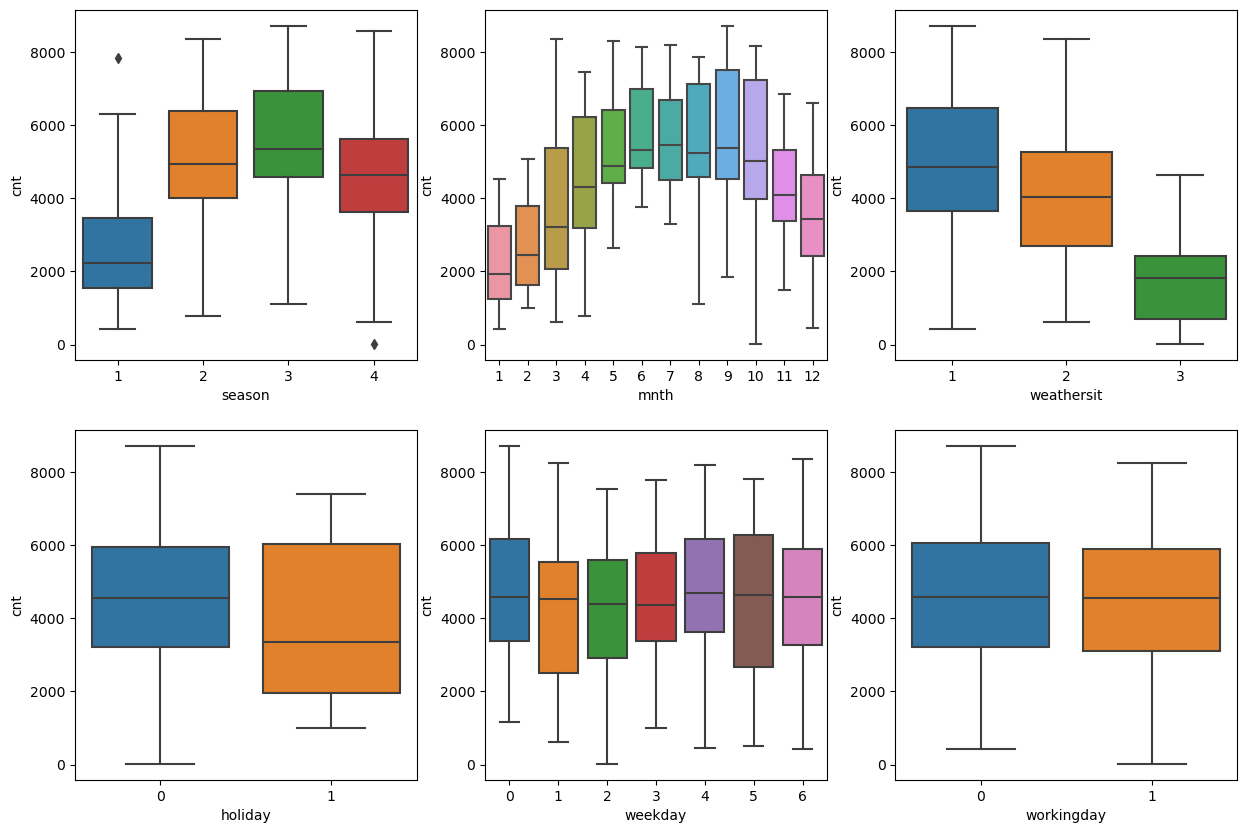

In [28]:
# ploting boxplot of categorical variables
# brfore creating dummy variables

plt.figure(figsize=(15,10))
plt.subplot(2,3,1)
sns.boxplot(x = 'season', y = 'cnt', data = bike_df)
plt.subplot(2,3,2)
sns.boxplot(x = 'mnth', y = 'cnt', data = bike_df)
plt.subplot(2,3,3)
sns.boxplot(x = 'weathersit', y = 'cnt', data = bike_df)
plt.subplot(2,3,4)
sns.boxplot(x = 'holiday', y = 'cnt', data = bike_df)
plt.subplot(2,3,5)
sns.boxplot(x = 'weekday', y = 'cnt', data = bike_df)
plt.subplot(2,3,6)
sns.boxplot(x = 'workingday', y = 'cnt', data = bike_df)
plt.show()

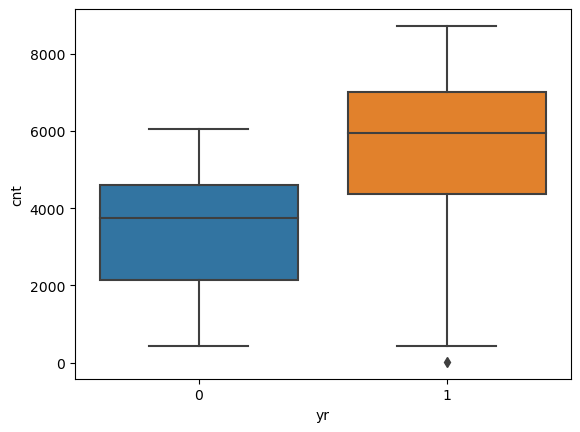

In [30]:
sns.boxplot(x = 'yr', y = 'cnt', data = bike_df)
plt.show()

## Finding

- Season 3 has highest demand for rental bikes. This was follwed by season 2 and season 4.
- Demand is continuously growing each month till june. September has highest demand.
- The weathersit 1 has highest demand.
- weekday variable shows very close trend.
- season, mnth, weathersit can be a good predictor for the dependent variables.


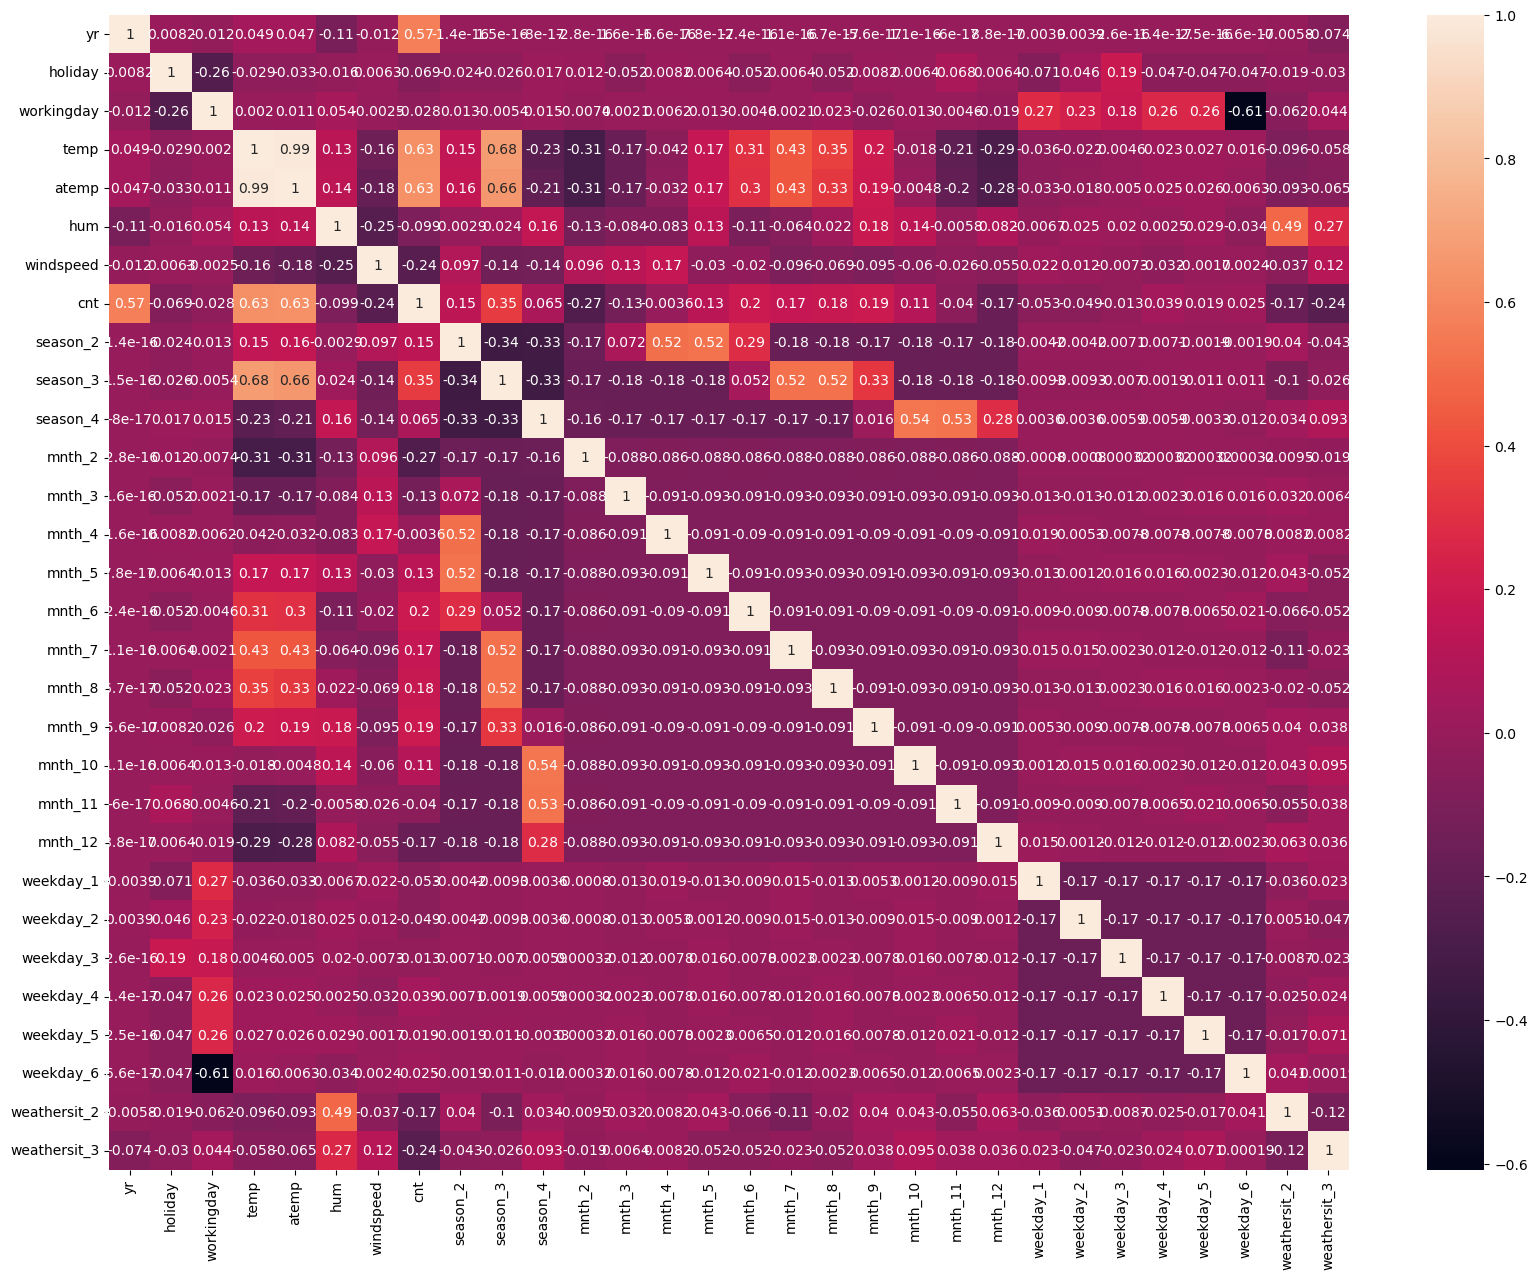

In [29]:
# plotting correlation metrix
plt.figure(figsize=(20,15))
sns.heatmap(new_bike_df.corr(), annot=True)
plt.show()

- The heatmap shows some variables are multicollinear and some variable has high collinearity with the target varble.

## Scalling the Features

In [32]:
scaler = MinMaxScaler()

In [33]:
# checking value before appling scaler
df_train.head()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,season_2,season_3,...,mnth_11,mnth_12,weekday_1,weekday_2,weekday_3,weekday_4,weekday_5,weekday_6,weathersit_2,weathersit_3
645,1,1,0,15.716653,19.38040,70.9583,12.708493,5478,0,0,...,0,0,0,1,0,0,0,0,1,0
163,0,0,1,26.035000,30.08270,49.4583,20.458450,5020,1,0,...,0,0,0,0,1,0,0,0,0,0
360,0,0,1,13.325000,16.38165,76.2500,12.626150,1162,0,0,...,0,1,0,0,0,1,0,0,1,0
640,1,0,1,26.957500,29.95665,79.3750,4.458569,7572,0,0,...,0,0,0,0,0,1,0,0,1,0
625,1,0,1,25.556653,28.25335,87.2500,23.958329,4073,0,1,...,0,0,0,0,1,0,0,0,1,0


In [34]:
num_variables =['temp', 'atemp', 'hum', 'windspeed','cnt']
df_train[num_variables] = scaler.fit_transform(df_train[num_variables])

In [35]:
# value check after appling
df_train.head()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,season_2,season_3,...,mnth_11,mnth_12,weekday_1,weekday_2,weekday_3,weekday_4,weekday_5,weekday_6,weathersit_2,weathersit_3
645,1,1,0,0.403972,0.404998,0.731215,0.419004,0.609320,0,0,...,0,0,0,1,0,0,0,0,1,0
163,0,0,1,0.717562,0.685963,0.509660,0.708724,0.554026,1,0,...,0,0,0,0,1,0,0,0,0,0
360,0,0,1,0.331287,0.326273,0.785745,0.415925,0.088253,0,0,...,0,1,0,0,0,1,0,0,1,0
640,1,0,1,0.745598,0.682653,0.817947,0.110593,0.862127,0,0,...,0,0,0,0,0,1,0,0,1,0
625,1,0,1,0.703024,0.637937,0.899098,0.839562,0.439696,0,1,...,0,0,0,0,1,0,0,0,1,0


In [37]:
df_train.describe().T

,count,mean,std,min,25%,50%,75%,max
yr,510.0,0.519608,0.500106,0.0,0.000000,1.000000,1.000000,1.0
holiday,510.0,0.027451,0.163554,0.0,0.000000,0.000000,0.000000,1.0
workingday,510.0,0.698039,0.459559,0.0,0.000000,1.000000,1.000000,1.0
temp,510.0,0.551313,0.227237,0.0,0.354526,0.575824,0.745338,1.0
atemp,510.0,0.526919,0.212992,0.0,0.354454,0.564951,0.698389,1.0
hum,510.0,0.654203,0.143788,0.0,0.544033,0.660798,0.756977,1.0
windspeed,510.0,0.415045,0.185760,0.0,0.281934,0.384737,0.526489,1.0
cnt,510.0,0.497429,0.234207,0.0,0.344772,0.501871,0.677080,1.0
season_2,510.0,0.258824,0.438419,0.0,0.000000,0.000000,1.000000,1.0
season_3,510.0,0.260784,0.439494,0.0,0.000000,0.000000,1.000000,1.0


## Model Building

In [38]:
# dividing into x and y sets 

y_train = df_train.pop('cnt')
x_train = df_train

In [39]:
x_train.shape

(510, 29)

In [40]:
y_train.shape

(510,)

## RFE

- We will use RFE(Recursive feature elimination) to remove insignificant features for model building.

In [41]:
lm = LinearRegression()
lm.fit(x_train, y_train)

LinearRegression()

In [42]:
rfe = RFE(lm,n_features_to_select=15)
rfe = rfe.fit(x_train, y_train)

In [43]:
list(zip(x_train.columns,rfe.support_,rfe.ranking_))

[('yr', True, 1),
 ('holiday', True, 1),
 ('workingday', False, 10),
 ('temp', True, 1),
 ('atemp', True, 1),
 ('hum', True, 1),
 ('windspeed', True, 1),
 ('season_2', True, 1),
 ('season_3', True, 1),
 ('season_4', True, 1),
 ('mnth_2', False, 8),
 ('mnth_3', False, 2),
 ('mnth_4', False, 15),
 ('mnth_5', False, 4),
 ('mnth_6', False, 9),
 ('mnth_7', True, 1),
 ('mnth_8', False, 12),
 ('mnth_9', True, 1),
 ('mnth_10', False, 3),
 ('mnth_11', True, 1),
 ('mnth_12', True, 1),
 ('weekday_1', False, 5),
 ('weekday_2', False, 7),
 ('weekday_3', False, 6),
 ('weekday_4', False, 14),
 ('weekday_5', False, 13),
 ('weekday_6', False, 11),
 ('weathersit_2', True, 1),
 ('weathersit_3', True, 1)]

In [44]:
col = x_train.columns[rfe.support_]
col

Index(['yr', 'holiday', 'temp', 'atemp', 'hum', 'windspeed', 'season_2',
       'season_3', 'season_4', 'mnth_7', 'mnth_9', 'mnth_11', 'mnth_12',
       'weathersit_2', 'weathersit_3'],
      dtype='object')

In [45]:
# Creating data frame with RFE selected variable
x_train_rfe = x_train[col]

## Building Linear Model using Stats Model

## Model 1

- VIF Check

In [46]:
# created a data frame which contain all features and their vifs
vif = pd.DataFrame()
vif['Features'] = x_train_rfe.columns
vif['VIF'] = [variance_inflation_factor(x_train_rfe.values, i) for i in range(x_train_rfe.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
3,atemp,1271.37
2,temp,1258.87
4,hum,17.75
7,season_3,7.80
5,windspeed,4.93
6,season_2,4.14
8,season_4,4.07
13,weathersit_2,2.13
0,yr,2.05
11,mnth_11,1.92


In [47]:
# Adding a Constant
x_train_lm1 = sm.add_constant(x_train_rfe)

# Create first model 
lr1 = sm.OLS(y_train, x_train_lm1).fit()

In [48]:
lr1.params

const           0.188389
yr              0.236983
holiday        -0.074990
temp            0.103086
atemp           0.381401
hum            -0.172785
windspeed      -0.121579
season_2        0.151785
season_3        0.124529
season_4        0.231171
mnth_7         -0.047653
mnth_9          0.066339
mnth_11        -0.078481
mnth_12        -0.062850
weathersit_2   -0.055819
weathersit_3   -0.212051
dtype: float64

In [45]:
lr1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.839
Model:                            OLS   Adj. R-squared:                  0.834
Method:                 Least Squares   F-statistic:                     171.9
Date:                Sun, 01 Dec 2024   Prob (F-statistic):          6.21e-185
Time:                        10:30:42   Log-Likelihood:                 483.14
No. Observations:                 510   AIC:                            -934.3
Df Residuals:                     494   BIC:                            -866.5
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const            0.1884      0.031      6.043      0.000       0.127       0.250
yr               0.2370      0.009     27.588      0.000       0.220       0.254
holiday         -0.0750      0.026     -2.875      0.004      -0.126      -0.024
temp             0.1031      0.252      0.410      0.682      -0.391       0.598
atemp            0.3814      0.266      1.432      0.153      -0.142       0.905
hum             -0.1728      0.040     -4.278      0.000      -0.252      -0.093
windspeed       -0.1216      0.026     -4.675      0.000      -0.173      -0.070
season_2         0.1518      0.017      8.953      0.000       0.118       0.185
season_3         0.1245      0.023      5.359      0.000       0.079       0.170
season_4         0.2312      0.017     13.513      0.000       0.198       0.265
mnth_7          -0.0477      0.019     -2.515      0.012      -0.085      -0.010
mnth_9           0.0663      0.017      3.808      0.000       0.032       0.101
mnth_11         -0.0785      0.020     -4.004      0.000      -0.117      -0.040
mnth_12         -0.0629      0.018     -3.429      0.001      -0.099      -0.027
weathersit_2    -0.0558      0.011     -4.999      0.000      -0.078      -0.034
weathersit_3    -0.2121      0.029     -7.410      0.000      -0.268      -0.156
==============================================================================
Omnibus:                       69.938   Durbin-Watson:                   2.030
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              147.420
Skew:                          -0.760   Prob(JB):                     9.73e-33
Kurtosis:                       5.151   Cond. No.                         147.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

- now removing atemp because of high vif.

In [49]:
x_train_new=x_train_rfe.drop(['atemp'], axis = 1)

## VIF Check

In [50]:
vif = pd.DataFrame()
vif['Features'] = x_train_new.columns
vif['VIF'] = [variance_inflation_factor(x_train_new.values, i) for i in range(x_train_new.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
2,temp,25.96
3,hum,16.37
6,season_3,7.75
4,windspeed,4.59
5,season_2,4.12
7,season_4,4.05
12,weathersit_2,2.10
0,yr,2.05
10,mnth_11,1.91
8,mnth_7,1.85


## Model 2

In [51]:
x_train_lm2 = sm.add_constant(x_train_new)

lr2 = sm.OLS(y_train, x_train_lm2).fit()

In [52]:
lr2.params

const           0.192978
yr              0.237013
holiday        -0.077717
temp            0.459593
hum            -0.166682
windspeed      -0.131663
season_2        0.153828
season_3        0.122239
season_4        0.233262
mnth_7         -0.046081
mnth_9          0.066166
mnth_11        -0.077808
mnth_12        -0.061819
weathersit_2   -0.057179
weathersit_3   -0.217703
dtype: float64

In [53]:
lr2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.839
Model:                            OLS   Adj. R-squared:                  0.834
Method:                 Least Squares   F-statistic:                     183.6
Date:                Sun, 14 Dec 2025   Prob (F-statistic):          1.25e-185
Time:                        19:33:20   Log-Likelihood:                 482.09
No. Observations:                 510   AIC:                            -934.2
Df Residuals:                     495   BIC:                            -870.7
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const            0.1930      0.031      6.217      0.000       0.132       0.254
yr               0.2370      0.009     27.562      0.000       0.220       0.254
holiday         -0.0777      0.026     -2.984      0.003      -0.129      -0.027
temp             0.4596      0.037     12.272      0.000       0.386       0.533
hum             -0.1667      0.040     -4.145      0.000      -0.246      -0.088
windspeed       -0.1317      0.025     -5.254      0.000      -0.181      -0.082
season_2         0.1538      0.017      9.097      0.000       0.121       0.187
season_3         0.1222      0.023      5.267      0.000       0.077       0.168
season_4         0.2333      0.017     13.671      0.000       0.200       0.267
mnth_7          -0.0461      0.019     -2.433      0.015      -0.083      -0.009
mnth_9           0.0662      0.017      3.794      0.000       0.032       0.100
mnth_11         -0.0778      0.020     -3.967      0.000      -0.116      -0.039
mnth_12         -0.0618      0.018     -3.372      0.001      -0.098      -0.026
weathersit_2    -0.0572      0.011     -5.134      0.000      -0.079      -0.035
weathersit_3    -0.2177      0.028     -7.673      0.000      -0.273      -0.162
==============================================================================
Omnibus:                       66.943   Durbin-Watson:                   2.034
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              138.863
Skew:                          -0.736   Prob(JB):                     7.02e-31
Kurtosis:                       5.090   Cond. No.                         19.7
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

- Removing varriable hum because of high VIF value.

In [54]:
x_train_new.drop(['hum'], axis = 1, inplace = True)

## VIF Check

In [55]:
vif = pd.DataFrame()
vif['Features'] = x_train_new.columns
vif['VIF'] = [variance_inflation_factor(x_train_new.values, i) for i in range(x_train_new.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
2,temp,16.27
5,season_3,7.38
6,season_4,4.04
3,windspeed,4.02
4,season_2,4.01
0,yr,2.04
9,mnth_11,1.86
7,mnth_7,1.83
11,weathersit_2,1.55
8,mnth_9,1.52


In [56]:
x_train_new.shape[1]

13

## Model 3

In [57]:
# adding constant 
x_train_lm3 = sm.add_constant(x_train_new)

lr3 = sm.OLS(y_train, x_train_lm3).fit()

In [58]:
lr3.params

const           0.093552
yr              0.242023
holiday        -0.079493
temp            0.433325
windspeed      -0.101346
season_2        0.156386
season_3        0.126253
season_4        0.230371
mnth_7         -0.041116
mnth_9          0.058898
mnth_11        -0.078582
mnth_12        -0.067258
weathersit_2   -0.083737
weathersit_3   -0.266125
dtype: float64

In [59]:
lr3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.833
Model:                            OLS   Adj. R-squared:                  0.829
Method:                 Least Squares   F-statistic:                     190.2
Date:                Sun, 14 Dec 2025   Prob (F-statistic):          3.96e-183
Time:                        19:34:25   Log-Likelihood:                 473.39
No. Observations:                 510   AIC:                            -918.8
Df Residuals:                     496   BIC:                            -859.5
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const            0.0936      0.020      4.672      0.000       0.054       0.133
yr               0.2420      0.009     27.974      0.000       0.225       0.259
holiday         -0.0795      0.026     -3.004      0.003      -0.131      -0.027
temp             0.4333      0.038     11.553      0.000       0.360       0.507
windspeed       -0.1013      0.024     -4.161      0.000      -0.149      -0.053
season_2         0.1564      0.017      9.107      0.000       0.123       0.190
season_3         0.1263      0.024      5.358      0.000       0.080       0.173
season_4         0.2304      0.017     13.298      0.000       0.196       0.264
mnth_7          -0.0411      0.019     -2.141      0.033      -0.079      -0.003
mnth_9           0.0589      0.018      3.340      0.001       0.024       0.094
mnth_11         -0.0786      0.020     -3.943      0.000      -0.118      -0.039
mnth_12         -0.0673      0.019     -3.619      0.000      -0.104      -0.031
weathersit_2    -0.0837      0.009     -9.046      0.000      -0.102      -0.066
weathersit_3    -0.2661      0.026    -10.128      0.000      -0.318      -0.214
==============================================================================
Omnibus:                       65.304   Durbin-Watson:                   2.064
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              139.336
Skew:                          -0.710   Prob(JB):                     5.54e-31
Kurtosis:                       5.131   Cond. No.                         16.4
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

- Removing season3 beacuse of high vif value.

In [60]:
x_train_new.drop(['season_3'], axis=1, inplace=True)

## VIF Check

In [61]:
vif = pd.DataFrame()
vif['Features'] = x_train_new.columns
vif['VIF'] = [variance_inflation_factor(x_train_new.values, i) for i in range(x_train_new.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
2,temp,6.11
3,windspeed,3.87
5,season_4,2.41
0,yr,2.02
4,season_2,1.99
8,mnth_11,1.78
6,mnth_7,1.71
10,weathersit_2,1.55
7,mnth_9,1.37
9,mnth_12,1.29


## Model 4 

In [62]:
x_train_lm4 = sm.add_constant(x_train_new)

lr4 = sm.OLS(y_train, x_train_lm4).fit()

In [63]:
lr4.params

const           0.067258
yr              0.240099
holiday        -0.086205
temp            0.583747
windspeed      -0.099863
season_2        0.090112
season_4        0.172293
mnth_7         -0.017732
mnth_9          0.087944
mnth_11        -0.052067
mnth_12        -0.055452
weathersit_2   -0.083128
weathersit_3   -0.258747
dtype: float64

In [64]:
lr4.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.823
Model:                            OLS   Adj. R-squared:                  0.819
Method:                 Least Squares   F-statistic:                     192.9
Date:                Sun, 14 Dec 2025   Prob (F-statistic):          3.01e-178
Time:                        19:35:34   Log-Likelihood:                 459.04
No. Observations:                 510   AIC:                            -892.1
Df Residuals:                     497   BIC:                            -837.0
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const            0.0673      0.020      3.372      0.001       0.028       0.106
yr               0.2401      0.009     27.032      0.000       0.223       0.258
holiday         -0.0862      0.027     -3.174      0.002      -0.140      -0.033
temp             0.5837      0.026     22.839      0.000       0.534       0.634
windspeed       -0.0999      0.025     -3.990      0.000      -0.149      -0.051
season_2         0.0901      0.012      7.362      0.000       0.066       0.114
season_4         0.1723      0.014     12.408      0.000       0.145       0.200
mnth_7          -0.0177      0.019     -0.923      0.357      -0.055       0.020
mnth_9           0.0879      0.017      5.101      0.000       0.054       0.122
mnth_11         -0.0521      0.020     -2.625      0.009      -0.091      -0.013
mnth_12         -0.0555      0.019     -2.925      0.004      -0.093      -0.018
weathersit_2    -0.0831      0.010     -8.740      0.000      -0.102      -0.064
weathersit_3    -0.2587      0.027     -9.597      0.000      -0.312      -0.206
==============================================================================
Omnibus:                       44.749   Durbin-Watson:                   2.071
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               75.620
Skew:                          -0.578   Prob(JB):                     3.80e-17
Kurtosis:                       4.490   Cond. No.                         11.4
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

- Removing mnth_7 because of high p-value 

In [65]:
x_train_new.drop(['mnth_7'], axis = 1, inplace = True)

## VIF Check

In [66]:
vif = pd.DataFrame()
vif['Features'] = x_train_new.columns
vif['VIF'] = [variance_inflation_factor(x_train_new.values, i) for i in range(x_train_new.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
2,temp,4.12
3,windspeed,3.80
5,season_4,2.27
0,yr,2.02
7,mnth_11,1.78
4,season_2,1.66
9,weathersit_2,1.54
8,mnth_12,1.29
6,mnth_9,1.24
10,weathersit_3,1.10


# Model 5

In [67]:
x_train_lm5 = sm.add_constant(x_train_new)

lr5 = sm.OLS(y_train, x_train_lm5).fit()

In [68]:
lr5.params

const           0.069821
yr              0.239892
holiday        -0.086390
temp            0.571916
windspeed      -0.099545
season_2        0.094666
season_4        0.175055
mnth_9          0.092879
mnth_11        -0.052908
mnth_12        -0.055871
weathersit_2   -0.082750
weathersit_3   -0.259739
dtype: float64

In [69]:
lr5.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.823
Model:                            OLS   Adj. R-squared:                  0.819
Method:                 Least Squares   F-statistic:                     210.4
Date:                Sun, 14 Dec 2025   Prob (F-statistic):          3.10e-179
Time:                        19:36:04   Log-Likelihood:                 458.60
No. Observations:                 510   AIC:                            -893.2
Df Residuals:                     498   BIC:                            -842.4
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const            0.0698      0.020      3.535      0.000       0.031       0.109
yr               0.2399      0.009     27.021      0.000       0.222       0.257
holiday         -0.0864      0.027     -3.181      0.002      -0.140      -0.033
temp             0.5719      0.022     25.871      0.000       0.528       0.615
windspeed       -0.0995      0.025     -3.979      0.000      -0.149      -0.050
season_2         0.0947      0.011      8.452      0.000       0.073       0.117
season_4         0.1751      0.014     12.912      0.000       0.148       0.202
mnth_9           0.0929      0.016      5.668      0.000       0.061       0.125
mnth_11         -0.0529      0.020     -2.670      0.008      -0.092      -0.014
mnth_12         -0.0559      0.019     -2.948      0.003      -0.093      -0.019
weathersit_2    -0.0827      0.010     -8.710      0.000      -0.101      -0.064
weathersit_3    -0.2597      0.027     -9.642      0.000      -0.313      -0.207
==============================================================================
Omnibus:                       47.185   Durbin-Watson:                   2.071
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               79.395
Skew:                          -0.606   Prob(JB):                     5.75e-18
Kurtosis:                       4.505   Cond. No.                         10.7
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [70]:
lr5.params

const           0.069821
yr              0.239892
holiday        -0.086390
temp            0.571916
windspeed      -0.099545
season_2        0.094666
season_4        0.175055
mnth_9          0.092879
mnth_11        -0.052908
mnth_12        -0.055871
weathersit_2   -0.082750
weathersit_3   -0.259739
dtype: float64

- This model looks good. For now, we will consider this as our final model.

## Final Model Interpretation

lr6 coefficient values
- const           0.069821
- yr              0.239892
- holiday        -0.086390
- temp            0.571916
- windspeed      -0.099545
- season_2        0.094666
- season_4        0.175055
- mnth_9          0.092879
- mnth_11        -0.052908
- mnth_12        -0.055871
- weathersit_2   -0.082750
- weathersit_3   -0.259739

### The equation of best fitted surface based on model lr5:

cnt = 0.069821 + (yr × 0.239892) - (holiday × 0.086390) + (temp × 0.571916) − (windspeed × 0.099545) + (season2 × 0.094666) + (season4 ×0.175055) + (mnth9 × 0.092879) - (mnth_11 ×0.052908) - (mnth_12 ×0.055871) − (weathersit2 × 0.082750) − (weathersit3 × 0.259739)



## Assumption

### Error term are normally distributed with mean zero.

- Residual Analysis of Traning data

In [71]:
y_train_pred = lr5.predict(x_train_lm5)

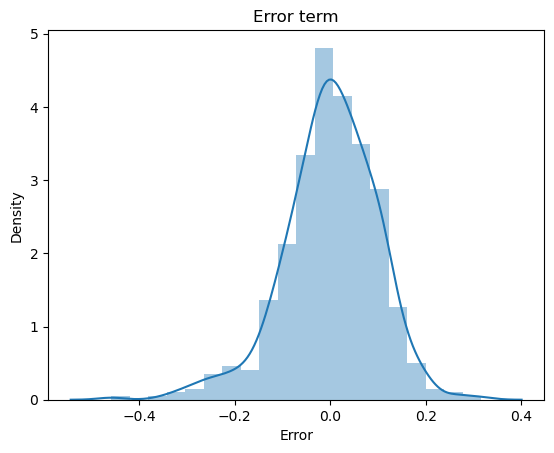

In [72]:
res = y_train - y_train_pred

sns.distplot(res,bins=20)
plt.title("Error term")
plt.xlabel("Error")
plt.show()


- From the above histogram, we could see that the Residuals are normally distributed. Hence our assumption for Linear Regression is valid.

- Other two assumption are proven earlier. which are, There is a liner relationship between x and y and there is no multicollinearity between predictore variables.

## Prediction Using Final Model

In [73]:
num_variables

['temp', 'atemp', 'hum', 'windspeed', 'cnt']

In [74]:
df_test[num_variables] = scaler.transform(df_test[num_variables])

In [75]:
df_test.head()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,season_2,season_3,...,mnth_11,mnth_12,weekday_1,weekday_2,weekday_3,weekday_4,weekday_5,weekday_6,weathersit_2,weathersit_3
468,1,0,0,0.543115,0.536771,0.518248,0.422104,0.848606,1,0,...,0,0,0,0,0,0,0,0,0,0
148,0,0,1,0.758058,0.704203,0.843709,0.479765,0.526017,1,0,...,0,0,0,1,0,0,0,0,0,0
302,0,0,1,0.324018,0.317998,0.642765,0.386287,0.350115,0,0,...,0,0,0,1,0,0,0,0,0,0
355,0,0,0,0.453814,0.455552,0.780592,0.062325,0.318363,0,0,...,0,1,0,0,0,0,0,1,1,0
515,1,0,1,0.773634,0.724915,0.507943,0.433030,0.833877,1,0,...,0,0,0,0,0,0,1,0,0,0


In [77]:
df_test.describe().T

,count,mean,std,min,25%,50%,75%,max
yr,220.0,0.454545,0.499065,0.000000,0.000000,0.000000,1.000000,1.000000
holiday,220.0,0.031818,0.175916,0.000000,0.000000,0.000000,0.000000,1.000000
workingday,220.0,0.672727,0.470288,0.000000,0.000000,1.000000,1.000000,1.000000
temp,220.0,0.526557,0.229808,0.047675,0.324018,0.505733,0.725609,0.970925
atemp,220.0,0.500943,0.215606,0.051010,0.314694,0.494075,0.684248,0.939531
hum,220.0,0.629591,0.152237,0.193646,0.521081,0.609274,0.734893,1.002146
windspeed,220.0,0.435018,0.212390,0.060760,0.281540,0.414837,0.533519,1.214955
cnt,220.0,0.480125,0.232713,-0.049378,0.287849,0.472957,0.639291,0.980804
season_2,220.0,0.236364,0.425817,0.000000,0.000000,0.000000,0.000000,1.000000
season_3,220.0,0.250000,0.434000,0.000000,0.000000,0.000000,0.250000,1.000000


### Dividing df_test in to x_test and y_test

In [78]:
y_test = df_test.pop('cnt')
x_test = df_test

In [79]:
y_test.shape

(220,)

In [80]:
x_test.shape

(220, 29)

In [81]:
# select the variable which are part of final model.
colmn = x_train_new.columns
x_test = x_test[colmn]

#add constant to test data frame
x_test_lm6 = sm.add_constant(x_test)
x_test_lm6.info()

<class 'pandas.core.frame.DataFrame'>
Index: 220 entries, 468 to 683
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   const         220 non-null    float64
 1   yr            220 non-null    int64  
 2   holiday       220 non-null    int64  
 3   temp          220 non-null    float64
 4   windspeed     220 non-null    float64
 5   season_2      220 non-null    int64  
 6   season_4      220 non-null    int64  
 7   mnth_9        220 non-null    int64  
 8   mnth_11       220 non-null    int64  
 9   mnth_12       220 non-null    int64  
 10  weathersit_2  220 non-null    int64  
 11  weathersit_3  220 non-null    int64  
dtypes: float64(3), int64(9)
memory usage: 22.3 KB


In [82]:
# Doing Predictions

y_pred = lr5.predict(x_test_lm6)

## Evaluation of model

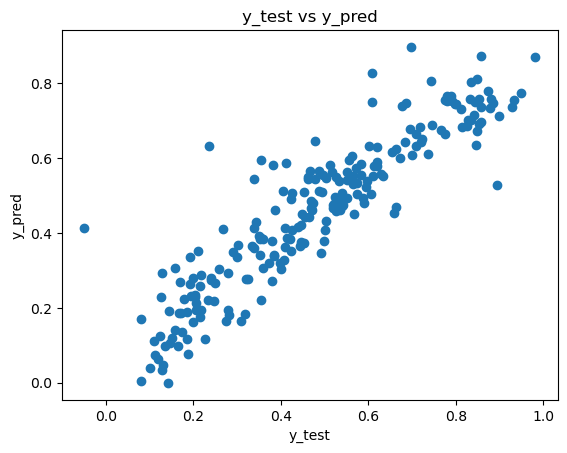

In [83]:
plt.scatter(y_test,y_pred)
plt.xlabel('y_test')
plt.ylabel('y_pred')
plt.title("y_test vs y_pred")
plt.show()

## R^2 Value for Test

In [84]:
from sklearn.metrics import r2_score
r2_score(y_test,y_pred)

0.8176272763664577

## Adjusted R^2 Value for Test

In [85]:
# we already calculated the R^2 value 
r2 = 0.8189683072792944

# n is number of rows 
n = x_test.shape[0]

# p is number of features
p = x_test.shape[1]


In [86]:
adjusted_r2 = 1-(1-r2)*(n-1)/(n-p-1)
adjusted_r2

0.8093945158373339

## Final Report

### Result Comparison
- Train R^2 :0.823
- Train Adjusted R^2 :0.819
- Test R^2 :0.817
- Test Adjusted R^2 :0.809

- This seems to be a really good model that can very well 'Generalize' various datasets.

----------------------------------------------------------------

- The top three predictor variables which influences the bike booking are:
  - Temperature (temp) - A coefficient value of '0.5719' indicated that a unit increase in temp variable increases the bike hire numbers by 0.5719 units.
  - Weather Situation 3 (weathersit_3) - A coefficient value of '-0.2597' indicated that a unit increase in Weathersit3 variable decreases the bike hire numbers by 0.2597 units.
  - Year (yr) - A coefficient value of '0.2398' indicated that a unit increase in yr variable increases the bike hire numbers by 0.2398 units.

- The next best features that can also be considered are
  - season_4: - A coefficient value of ‘0.1750’ indicated that, a unit increase in season_4 variable increases the bike hire numbers by 0.1750 units.
  - windspeed: - A coefficient value of '-0.1011' indicated that, a unit increase in windspeed variable decreases the bike hire numbers by 0.0995 units.

- The details of weathersit_2 & weathersit_3
  - weathersit_2: Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist
  - weathersit_3: Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds

- The details of season1 & season4

  - season2: summer
  - season4: winter